In [8]:
import numpy as np
import tensorflow.keras,os
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import *
from matplotlib import pyplot  as plt
import tensorflow as tf
import gc
tf.config.run_functions_eagerly(True)

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
def get_new_vgg(lr):
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=8,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = 'he_normal'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=512,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(units=32,activation="relu"))
    model.add(Dense(units=6, activation="sigmoid"))
    opt = Adam(lr)
    model.compile(optimizer=opt, loss=tensorflow.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])
    return model

In [11]:
model = get_new_vgg(1e-4)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 8)       584       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 16)      1168      
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                 

In [12]:
train0 = np.load('../Training Dataset/train_signal.npy')
label0 = np.load('../Training Dataset/label_signal.npy')
print(train0.shape)
print(label0.shape)
N = int(label0[:,0].max())+1

(3000, 224, 224, 3)
(3000, 7)


In [14]:
model = get_new_vgg(1e-5)
csv_logger = CSVLogger('../Training Dataset/logs/model_signal.log')
model_checkpoint = ModelCheckpoint('model_signal.hdf5', monitor='loss',verbose=1, save_best_only=False)
hist = model.fit(train0, label0[:,1::], batch_size=32, epochs=100, verbose=1, shuffle=True, callbacks=[csv_logger, model_checkpoint])

Epoch 1/100
93/94 [============================>.] - ETA: 0s - loss: 11.5832 - binary_accuracy: 0.6605
Epoch 1: saving model to model_signal.hdf5
94/94 [==============================] - 6s 67ms/step - loss: 11.5133 - binary_accuracy: 0.6611
Epoch 2/100
94/94 [==============================] - ETA: 0s - loss: 1.9397 - binary_accuracy: 0.7692
Epoch 2: saving model to model_signal.hdf5
94/94 [==============================] - 4s 46ms/step - loss: 1.9397 - binary_accuracy: 0.7692
Epoch 3/100
94/94 [==============================] - ETA: 0s - loss: 0.6136 - binary_accuracy: 0.8857
Epoch 3: saving model to model_signal.hdf5
94/94 [==============================] - 4s 37ms/step - loss: 0.6136 - binary_accuracy: 0.8857
Epoch 4/100
94/94 [==============================] - ETA: 0s - loss: 0.2748 - binary_accuracy: 0.9327
Epoch 4: saving model to model_signal.hdf5
94/94 [==============================] - 4s 38ms/step - loss: 0.2748 - binary_accuracy: 0.9327
Epoch 5/100
94/94 [===================

Epoch 35/100
93/94 [============================>.] - ETA: 0s - loss: 0.0171 - binary_accuracy: 0.9943
Epoch 35: saving model to model_signal.hdf5
94/94 [==============================] - 3s 35ms/step - loss: 0.0170 - binary_accuracy: 0.9943
Epoch 36/100
94/94 [==============================] - ETA: 0s - loss: 0.0141 - binary_accuracy: 0.9949
Epoch 36: saving model to model_signal.hdf5
94/94 [==============================] - 3s 36ms/step - loss: 0.0141 - binary_accuracy: 0.9949
Epoch 37/100
94/94 [==============================] - ETA: 0s - loss: 0.0222 - binary_accuracy: 0.9920
Epoch 37: saving model to model_signal.hdf5
94/94 [==============================] - 3s 37ms/step - loss: 0.0222 - binary_accuracy: 0.9920
Epoch 38/100
94/94 [==============================] - ETA: 0s - loss: 0.0176 - binary_accuracy: 0.9941
Epoch 38: saving model to model_signal.hdf5
94/94 [==============================] - 4s 41ms/step - loss: 0.0176 - binary_accuracy: 0.9941
Epoch 39/100
94/94 [============

Epoch 69/100
93/94 [============================>.] - ETA: 0s - loss: 0.0082 - binary_accuracy: 0.9972
Epoch 69: saving model to model_signal.hdf5
94/94 [==============================] - 3s 37ms/step - loss: 0.0081 - binary_accuracy: 0.9972
Epoch 70/100
94/94 [==============================] - ETA: 0s - loss: 0.0031 - binary_accuracy: 0.9992
Epoch 70: saving model to model_signal.hdf5
94/94 [==============================] - 4s 40ms/step - loss: 0.0031 - binary_accuracy: 0.9992
Epoch 71/100
94/94 [==============================] - ETA: 0s - loss: 0.0023 - binary_accuracy: 0.9991
Epoch 71: saving model to model_signal.hdf5
94/94 [==============================] - 4s 38ms/step - loss: 0.0023 - binary_accuracy: 0.9991
Epoch 72/100
94/94 [==============================] - ETA: 0s - loss: 0.0037 - binary_accuracy: 0.9988
Epoch 72: saving model to model_signal.hdf5
94/94 [==============================] - 3s 37ms/step - loss: 0.0037 - binary_accuracy: 0.9988
Epoch 73/100
93/94 [============

0.0009919790318235755
0.999666690826416


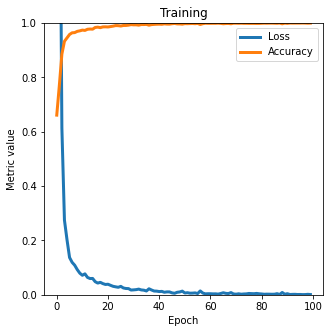

In [15]:
f,ax = plt.subplots(1,1,figsize = (5,5))
ax.plot(hist.history['loss'],alpha = 1,linewidth = 3,color = 'C0', label = 'Loss')
ax.plot(hist.history['binary_accuracy'],alpha = 1,linewidth = 3,color = 'C1', label = 'Accuracy')
ax.set_ylabel('Metric value')
ax.set_xlabel('Epoch')
ax.set_title('Training')
ax.legend()
ax.set_ylim([0, 1])
print(hist.history['loss'][-1])
print(hist.history['binary_accuracy'][-1])